In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


READ DATASET


In [ ]:
df = pd.concat([df1, df2, df3, df4])
df


,Address A,Port A,Address B,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Target
0,192.168.1.7,51566.0,142.250.196.163,443.0,18.0,6757.0,9.0,2450.0,9.0,4307.0,2.356758,0.229653,85346.152670,150035.052900,1.0
1,192.168.1.7,62638.0,142.250.182.34,443.0,25.0,8291.0,12.0,2997.0,13.0,5294.0,2.403463,0.418188,57333.065510,101275.024600,1.0
2,192.168.1.7,58974.0,142.250.196.163,443.0,12.0,6947.0,6.0,3427.0,6.0,3520.0,3.402209,0.144535,189684.159500,194831.701700,1.0
3,192.168.1.7,63841.0,142.250.195.228,443.0,10.0,5110.0,5.0,1676.0,5.0,3434.0,14.951815,0.128230,104562.114900,214240.037400,1.0
4,192.168.1.7,54024.0,142.250.195.228,443.0,10.0,5108.0,5.0,1674.0,5.0,3434.0,14.958695,0.142619,93900.532190,192625.106100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,192.168.0.103,53021.0,35.201.126.82,443.0,52.0,34319.0,31.0,28930.0,21.0,5389.0,314.312008,1.072764,215741.766100,40187.776620,1.0
282,192.168.0.103,58380.0,35.166.148.67,443.0,19.0,7125.0,9.0,1142.0,10.0,5983.0,250.632339,63.019763,144.970396,759.507775,0.0
283,192.168.0.103,59293.0,35.201.126.82,443.0,118.0,85533.0,80.0,77915.0,38.0,7618.0,249.395920,0.639645,974478.030800,95277.849430,1.0
284,192.168.0.103,58370.0,142.250.183.182,443.0,19.0,7013.0,9.0,1080.0,10.0,5933.0,247.534513,65.868246,131.170944,720.590009,0.0


Data Pre-processing


In [ ]:
df.drop(
    [
        "Address A",
        "Address B",
    ],
    axis=1,
    inplace=True,
)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv("/content/drive/MyDrive/Datasets/combined_flow.csv")
df.head(10)


(5585, 13)
(5585, 13)


,Port A,Port B,Packets,Bytes,Packets A ? B,Bytes A ? B,Packets B ? A,Bytes B ? A,Rel Start,Duration,Bits/s A ? B,Bits/s B ? A,Target
0,57699,443,34,9320,16,3896,18,5424,1127.754471,301.280479,103.451774,144.025262,0
1,55270,443,92,45186,41,13271,51,31915,1156.207728,13.162032,8066.231719,19398.220580,1
2,63234,443,9,4758,4,2217,5,2541,180.238231,0.273681,64805.375600,74276.255930,1
3,65505,80,15,5610,8,657,7,4953,708.929037,60.436953,86.966661,655.625375,0
4,56266,443,17,6458,8,2333,9,4125,2044.865534,0.103956,179537.496600,317441.994700,1
5,58953,443,23,12472,10,4443,13,8029,878.073362,8.479487,4191.763016,7574.986553,1
6,64784,443,21,6118,12,1633,9,4485,1298.045791,0.391380,33379.324440,91675.609380,0
7,64711,443,27,13000,12,1546,15,11454,54.257522,2.107396,5868.854264,43481.149250,0
8,63671,443,371,41233,187,20496,184,20737,78.902945,245.983593,666.581043,674.418964,1
9,57620,443,71,38133,34,21150,37,16983,1054.769799,134.286861,1259.989240,1011.744552,0


Data Sepecfications


Total packets: 5585
0    2991
1    2594
Name: Target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


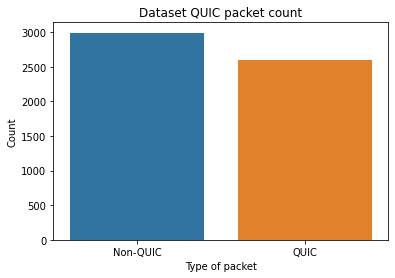

In [ ]:
packet_protocol = df["Target"]
packet_protocol = ["QUIC" if x else "Non-QUIC" for x in packet_protocol]

print("Total packets: {0}".format(len(packet_protocol)))
print(df["Target"].value_counts())

chart = sns.countplot(packet_protocol)
plt.title("Dataset QUIC packet count")
plt.xlabel("Type of packet")
plt.ylabel("Count")
plt.show()


In [ ]:
targets = list(df["Target"].values)
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)
df


,Port A,Port B,Packets,Bytes,Packets A ? B,Bytes A ? B,Packets B ? A,Bytes B ? A,Rel Start,Duration,Bits/s A ? B,Bits/s B ? A
0,57699,443,34,9320,16,3896,18,5424,1127.754471,301.280479,103.451774,1.440253e+02
1,55270,443,92,45186,41,13271,51,31915,1156.207728,13.162032,8066.231719,1.939822e+04
2,63234,443,9,4758,4,2217,5,2541,180.238231,0.273681,64805.375600,7.427626e+04
3,65505,80,15,5610,8,657,7,4953,708.929037,60.436953,86.966661,6.556254e+02
4,56266,443,17,6458,8,2333,9,4125,2044.865534,0.103956,179537.496600,3.174420e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
5580,54034,443,17,6343,8,2374,9,3969,170.027695,0.255373,74369.647540,1.243358e+05
5581,63889,443,65,24714,32,11510,33,13204,3089.523746,11.297833,8150.235536,9.349758e+03
5582,52716,443,138,106107,50,11209,88,94898,2968.816944,2.532614,35406.895800,2.997630e+05
5583,64433,443,21,2811,11,1656,10,1155,1106.259755,1.757228,7539.146884,5.258282e+03


In [ ]:
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification

X_train, X_test, Y_train, Y_test = train_test_split(
    df, targets, test_size=0.30, random_state=7, shuffle=True
)

X, Y = make_classification(
    n_samples=100, n_features=12, n_informative=12, n_redundant=0, random_state=7
)
cv = KFold(n_splits=4, random_state=7, shuffle=True)
metrics = {}
metrics1 = {}


In [ ]:
print("Size of test: {0}, {1}".format(len(X_test), len(Y_test)))
print("Size of train: {0}, {1}".format(len(X_train), len(Y_train)))


Size of test: 1676, 1676
Size of train: 3909, 3909


LOGISTIC REGRESSION


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=7)
clf = model.fit(X_train, Y_train)
predictions = clf.predict(X_test)

print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["LogisticRegression"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["LogisticRegression"] = {"CVAccuracy": mean(scores)}


              precision    recall  f1-score   support

           0       0.73      0.91      0.81       898
           1       0.86      0.62      0.72       778

    accuracy                           0.78      1676
   macro avg       0.80      0.77      0.77      1676
weighted avg       0.79      0.78      0.77      1676

Accuracy: 77.68496420047732%
f1-score: 72.00598802395209%
Accuracy: 61.82519280205655%
Precision: 86.20071684587813%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CV Accuracy: 85.000 (0.017)


DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["DecisionTree"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["DecisionTree"] = {"CVAccuracy": mean(scores)}


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       898
           1       0.94      0.93      0.94       778

    accuracy                           0.94      1676
   macro avg       0.94      0.94      0.94      1676
weighted avg       0.94      0.94      0.94      1676

Accuracy: 94.03341288782816%
f1-score: 93.51491569390402%
Accuracy: 92.67352185089975%
Precision: 94.3717277486911%
CV Accuracy: 68.000 (0.040)


GRADIENT BOOST


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["GradientBoost"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["GradientBoost"] = {"CVAccuracy": mean(scores)}


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       898
           1       0.94      0.97      0.95       778

    accuracy                           0.96      1676
   macro avg       0.96      0.96      0.96      1676
weighted avg       0.96      0.96      0.96      1676

Accuracy: 95.70405727923628%
f1-score: 95.44303797468355%
Accuracy: 96.91516709511568%
Precision: 94.0149625935162%
CV Accuracy: 76.000 (0.075)


NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# start = perf_counter()
model = BernoulliNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(predictions)
print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["NaiveBayes"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["NaiveBayes"] = {"CVAccuracy": mean(scores)}


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       898
           1       0.00      0.00      0.00       778

    accuracy                           0.54      1676
   macro avg       0.27      0.50      0.35      1676
weighted avg       0.29      0.54      0.37      1676

Accuracy: 53.5799522673031%
f1-score: 0.0%
Accuracy: 0.0%
Precision: 0.0%
CV Accuracy: 76.000 (0.049)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["KNN"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["KNN"] = {"CVAccuracy": mean(scores)}


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       898
           1       0.89      0.89      0.89       778

    accuracy                           0.90      1676
   macro avg       0.90      0.90      0.90      1676
weighted avg       0.90      0.90      0.90      1676

Accuracy: 90.03579952267303%
f1-score: 89.27424534360951%
Accuracy: 89.33161953727506%
Precision: 89.21694480102695%
CV Accuracy: 87.000 (0.052)


RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

score = model.score(X_test, Y_test) * 100
f1 = f1_score(Y_test, predictions) * 100
recall = recall_score(Y_test, predictions) * 100
precision = precision_score(Y_test, predictions) * 100

metrics["RandomForest"] = {
    "Accuracy": score,
    "f1-score": f1,
    "Recall": recall,
    "Precision": precision,
}

print("Accuracy: {0}%".format(score))
print("f1-score: {0}%".format(f1))
print("Accuracy: {0}%".format(recall))
print("Precision: {0}%".format(precision))

scores = cross_val_score(model, X, Y, scoring="accuracy", cv=cv, n_jobs=-1)
print("CV Accuracy: %.3f (%.3f)" % (mean(scores) * 100, std(scores)))
metrics1["RandomForest"] = {"CVAccuracy": mean(scores)}


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       898
           1       0.95      0.96      0.95       778

    accuracy                           0.96      1676
   macro avg       0.96      0.96      0.96      1676
weighted avg       0.96      0.96      0.96      1676

Accuracy: 95.76372315035799%
f1-score: 95.48058561425844%
Accuracy: 96.40102827763496%
Precision: 94.57755359394704%
CV Accuracy: 81.000 (0.077)


Port A           0.053944
Port B           0.002911
Packets          0.031407
Bytes            0.051730
Packets A → B    0.032389
Bytes A → B      0.147013
Packets B → A    0.037972
Bytes B → A      0.066363
Rel Start        0.038752
Duration         0.130267
Bits/s A → B     0.248203
Bits/s B → A     0.159049
dtype: float64


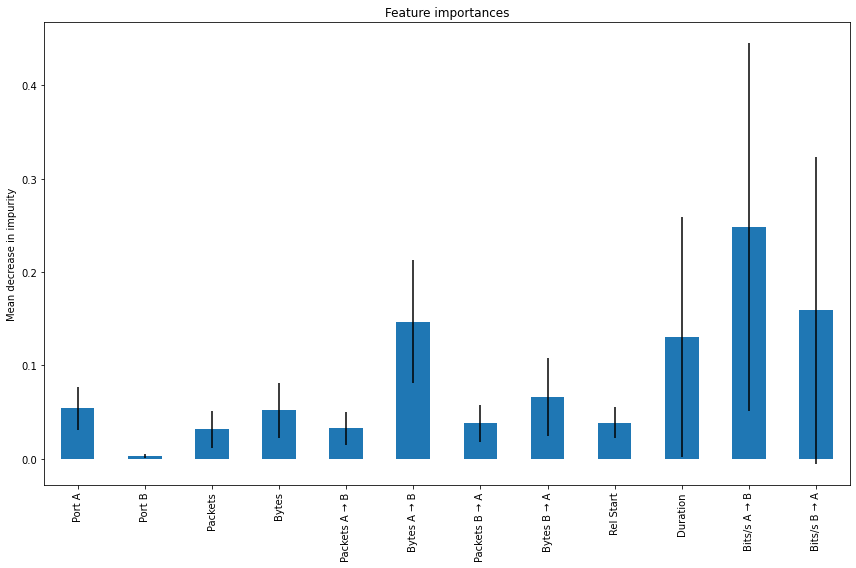

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

features = list(df.columns)
classifier_importances = pd.Series(importances, index=features)
print(classifier_importances)

fig, ax = plt.subplots()
classifier_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout(rect=(0, 0, 2, 2))
plt.show()


ACCURACY


In [ ]:
print(metrics)
print(metrics1)


{'LogisticRegression': {'Accuracy': 77.68496420047732, 'f1-score': 72.00598802395209, 'Recall': 61.82519280205655, 'Precision': 86.20071684587813}, 'DecisionTree': {'Accuracy': 94.03341288782816, 'f1-score': 93.51491569390402, 'Recall': 92.67352185089975, 'Precision': 94.3717277486911}, 'GradientBoost': {'Accuracy': 95.70405727923628, 'f1-score': 95.44303797468355, 'Recall': 96.91516709511568, 'Precision': 94.0149625935162}, 'NaiveBayes': {'Accuracy': 53.5799522673031, 'f1-score': 0.0, 'Recall': 0.0, 'Precision': 0.0}, 'KNN': {'Accuracy': 90.03579952267303, 'f1-score': 89.27424534360951, 'Recall': 89.33161953727506, 'Precision': 89.21694480102695}, 'RandomForest': {'Accuracy': 95.76372315035799, 'f1-score': 95.48058561425844, 'Recall': 96.40102827763496, 'Precision': 94.57755359394704}}
{'LogisticRegression': {'CVAccuracy': 0.85}, 'DecisionTree': {'CVAccuracy': 0.6799999999999999}, 'GradientBoost': {'CVAccuracy': 0.76}, 'NaiveBayes': {'CVAccuracy': 0.7600000000000001}, 'KNN': {'CVAccur

LogisticRegression                  77.68496420047732%
DecisionTree                        94.03341288782816%
GradientBoost                       95.70405727923628%
NaiveBayes                          53.5799522673031%
KNN                                 90.03579952267303%
RandomForest                        95.76372315035799%


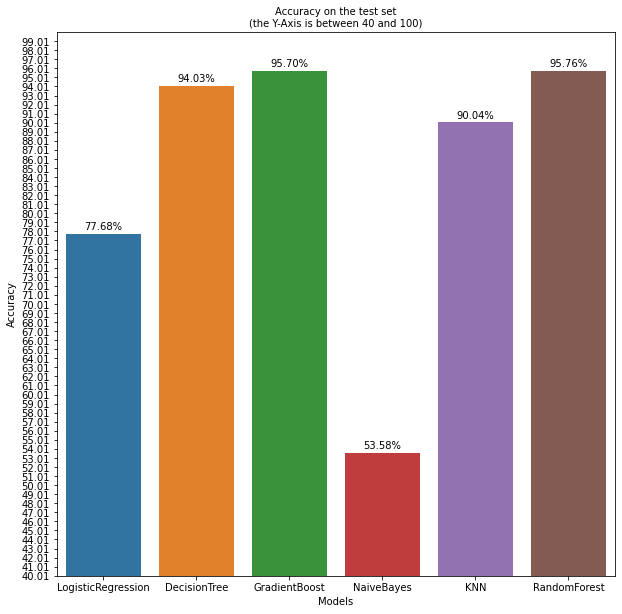

In [ ]:
ticks = []
accuracy = []
models_accuracy = []

for k, v in metrics.items():
    accuracy.append(v["Accuracy"])
    models_accuracy.append(
        [k, v["Accuracy"], v["f1-score"], v["Recall"], v["Precision"]]
    )
    print("{0:<35} {1}%".format(k, v["Accuracy"]))

df_acc = pd.DataFrame(models_accuracy)
df_acc.columns = ["Models", "Accuracy", "f1-score", "Recall", "Precision"]

plt.figure(figsize=(10, 10))
g = sns.barplot(x="Models", y="Accuracy", data=df_acc)
for i in range(0, 100):
    val = i + 0.01
    ticks.append(val)
g.set_yticks(ticks)
g.set_yticklabels(ticks)

plt.title("Accuracy on the test set\n(the Y-Axis is between 40 and 100)", fontsize=10)
plt.ylim(40, 100)
for i, p in enumerate(g.patches):
    percentage = "{:.2f}%".format(accuracy[i])
    x = p.get_x() + (p.get_width() / 2)
    y = p.get_height() + 0.5
    g.annotate(percentage, (x, y), ha="center")

plt.show()


{'LogisticRegression': {'CVAccuracy': 0.85}, 'DecisionTree': {'CVAccuracy': 0.6799999999999999}, 'GradientBoost': {'CVAccuracy': 0.76}, 'NaiveBayes': {'CVAccuracy': 0.7600000000000001}, 'KNN': {'CVAccuracy': 0.87}, 'RandomForest': {'CVAccuracy': 0.8099999999999999}}
LogisticRegression                  85.0%
DecisionTree                        68.0%
GradientBoost                       76.0%
NaiveBayes                          76.00000000000001%
KNN                                 87.0%
RandomForest                        81.0%


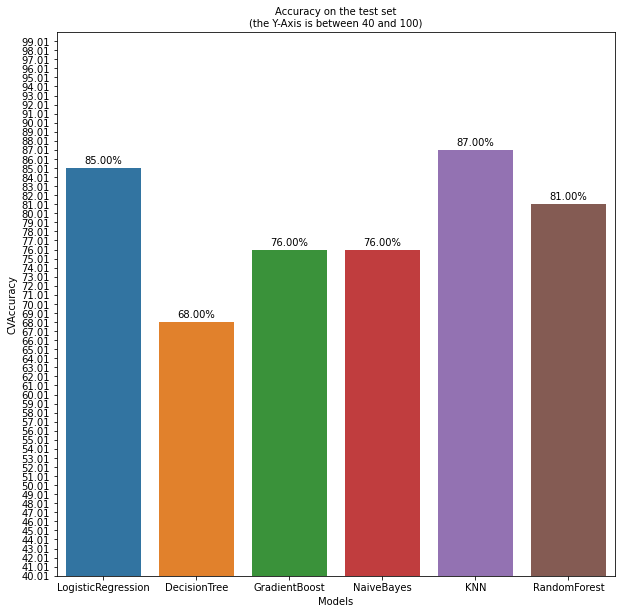

In [ ]:
ticks = []
cvaccuracy = []
models_cvaccuracy = []
print(metrics1)
for k, v in metrics1.items():
    try:
        cvaccuracy.append(v["CVAccuracy"] * 100)
        models_cvaccuracy.append([k, v["CVAccuracy"] * 100])
        print("{0:<35} {1}%".format(k, v["CVAccuracy"] * 100))

    except KeyError:
        cvaccuracy.append(10.30)
        models_cvaccuracy.append(10.30)
        print("{0:<35} {1}%".format(k, 01.03))
        continue


df_acc2 = pd.DataFrame(models_cvaccuracy)
df_acc2.columns = ["Models", "CVAccuracy"]

plt.figure(figsize=(10, 10))
g = sns.barplot(x="Models", y="CVAccuracy", data=df_acc2)
for i in range(0, 100):
    val = i + 0.01
    ticks.append(val)
g.set_yticks(ticks)
g.set_yticklabels(ticks)

plt.title("Accuracy on the test set\n(the Y-Axis is between 40 and 100)", fontsize=10)
plt.ylim(40, 100)
for i, p in enumerate(g.patches):
    percentage = "{:.2f}%".format(cvaccuracy[i])
    x = p.get_x() + (p.get_width() / 2)
    y = p.get_height() + 0.5
    g.annotate(percentage, (x, y), ha="center")

plt.show()


In [ ]:
df_acc.head()


,Models,Accuracy,f1-score,Recall,Precision
0,LogisticRegression,77.684964,72.005988,61.825193,86.200717
1,DecisionTree,94.033413,93.514916,92.673522,94.371728
2,GradientBoost,95.704057,95.443038,96.915167,94.014963
3,NaiveBayes,53.579952,0.000000,0.000000,0.000000
4,KNN,90.035800,89.274245,89.331620,89.216945


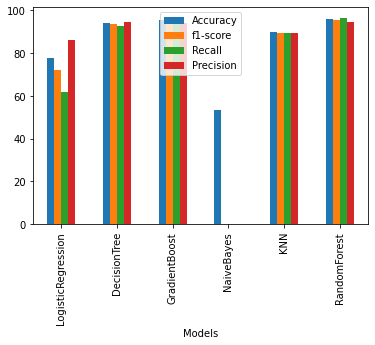

In [ ]:
df_acc.plot(x="Models", y=["Accuracy", "f1-score", "Recall", "Precision"], kind="bar")


CNN


In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
Y1 = np.array(targets).reshape(-1, 1)
Y1 = ohe.fit_transform(Y1).toarray()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df, Y1, test_size=0.20, random_state=7, shuffle=True
)


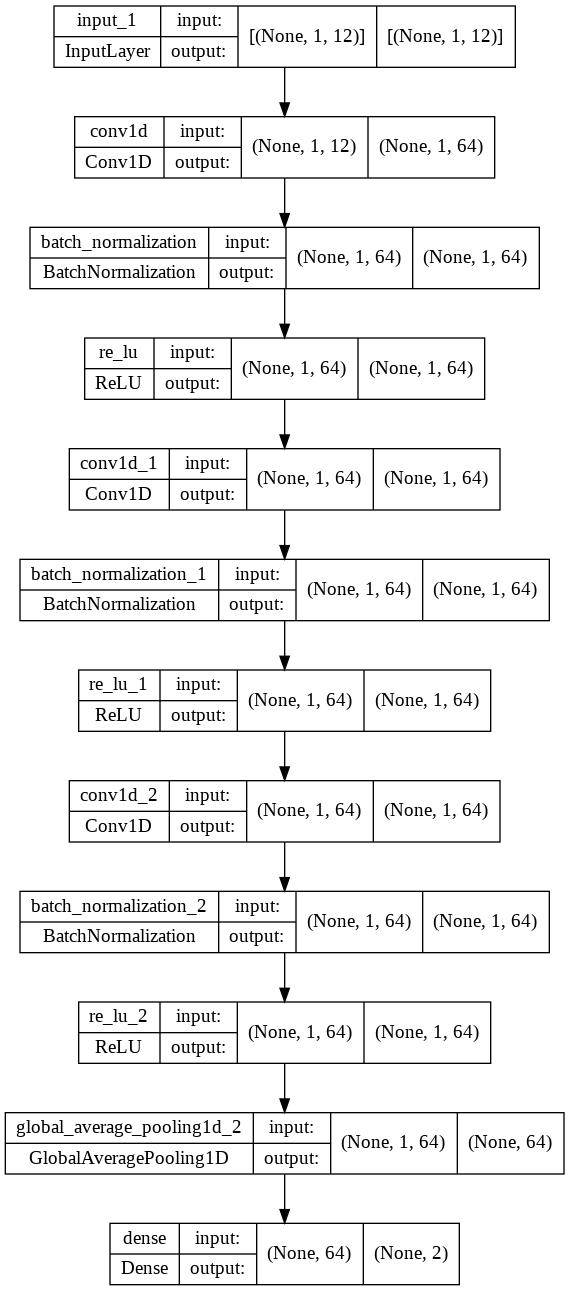

In [ ]:
import tensorflow as tf

# tf.config.run_functions_eagerly(True)
# X_train = X_train
# X_train = X_train.values.reshape(-1,1,16)
X_train = np.expand_dims(X_train, axis=1)


def make_model(input_shape):
    # X_test=X_test.reshape(-1,1,16)
    # Y_test=Y_test.reshape(-1,2)

    input_layer = keras.layers.Input(input_shape)
    # X_test=X_test.reshape(-1,1,16)
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    gap = keras.layers.GlobalAveragePooling1D()(conv2)
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(2, activation="sigmoid")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["binary_accuracy"]
)


In [ ]:
epochs = 100
batch_size = 32


In [ ]:
Y_test = np.array(Y_test)


In [ ]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/100


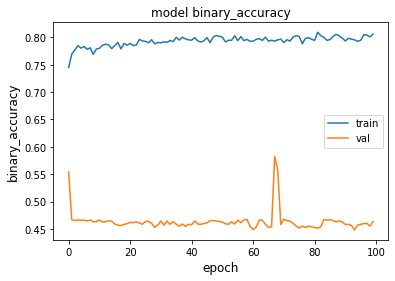

In [ ]:
metric = "binary_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()


In [ ]:
Y_train = to_categorical(trainy)
Y_testy = to_categorical(testy)


In [ ]:
X_train.shape


(6052, 12)

In [ ]:
Y_train.shape


(6052, 2)

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[0], X_train.shape[1], Y_train.shape[1]


In [ ]:
X_train = X_train.values.reshape(-1, 1, 12)


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(10, 128)))
model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(n_outputs, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
verbose, epochs, batch_size = 0, 10, 32


In [ ]:
X_train.shape


(6052, 1, 12)

In [ ]:
X_train = X_train.reshape(-1, 1, 12)


In [ ]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)


ValueError: ignored

In [ ]:
model2 = Sequential()
model2.add(
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(8, 8, 1), padding="same")
)
model2.add(layers.MaxPooling2D((1, 1), padding="same"))
model2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model2.add(layers.MaxPooling2D((2, 2), padding="same"))
model2.add(layers.Conv2D(16, (3, 3), activation="softmax", padding="same"))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(2))


In [ ]:
model2.summary()
